In [3]:
#Importing all the required libraries
import pandas as pd #It makes working with structured data (like CSV files or database tables) easier. You can filter, transform, and analyze data easily using pandas.
import numpy as np #mathematical library #It helps with working on large sets of numbers efficiently, performing mathematical operations, and handling multi-dimensional arrays (like tables of numbers).
import sklearn # It provides machine learning tools and algorithms for tasks like classification, regression, clustering, and more. It helps you build and train machine learning models.
import matplotlib.pyplot as plt #It helps create visualizations such as line plots, scatter plots, and histograms. You can use it to represent your data visually.
import seaborn as sns #It builds on top of matplotlib and makes it simpler to create statistical visualizations with better aesthetics. It's useful for creating attractive plots like heatmaps, violin plots, and more.
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Customer-Churn-Prediction.csv') #import data set

In [5]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [6]:
df.head() #ISP Company

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['Churn'].value_counts()
#churn
#will take service in the next month (no-> 0)
#will not take service in the next month (yes-> 1)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
5174 / (5174+1869)

0.7346301292063041

<Axes: xlabel='Churn', ylabel='count'>

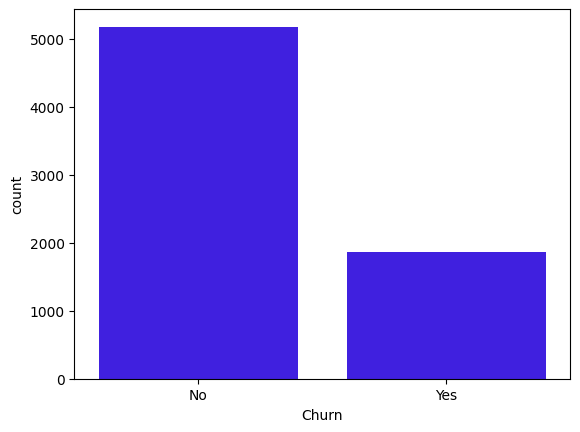

In [11]:
#sns.countplot(df['Churn'],color='#2B00FF')
sns.countplot(data=df, x='Churn', color='#2B00FF')

In [12]:
df = df.dropna() #used to remove any rows from the DataFrame df that contain missing values (NaN)

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7043, 21)

**Basic Visualization using Seaborn Library**

Which feature(s) are responsible for 'churn'? Which are highly correlated?

<Axes: xlabel='count', ylabel='gender'>

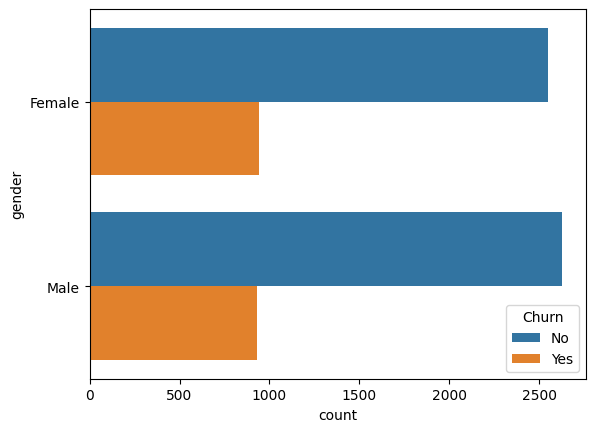

In [15]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<Axes: xlabel='gender', ylabel='count'>

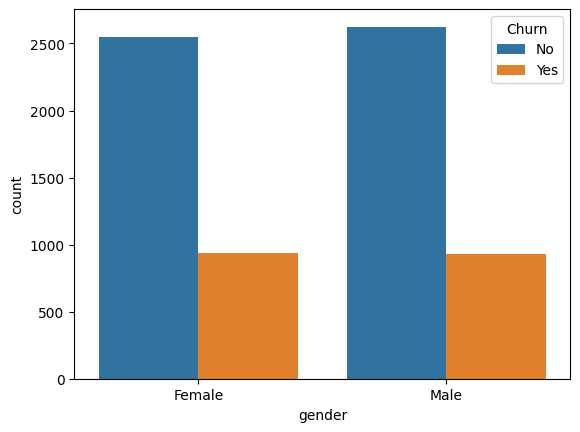

In [16]:
sns.countplot(x = 'gender', hue='Churn', data=df) # Churn is class column

<Axes: xlabel='InternetService', ylabel='count'>

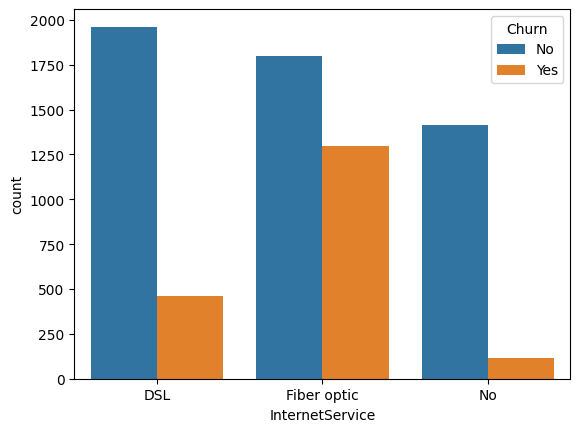

In [17]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

In [18]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

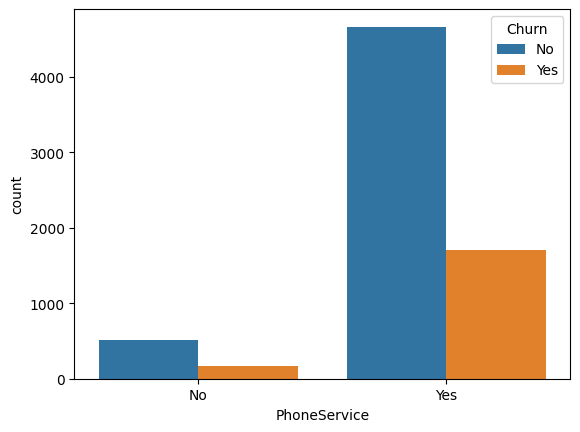

In [19]:
sns.countplot(x = 'PhoneService', hue='Churn', data=df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

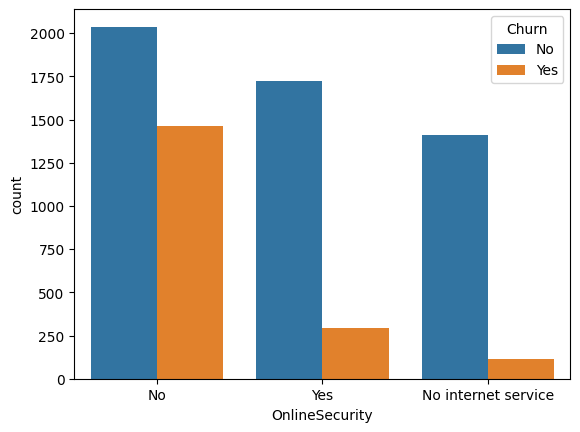

In [20]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [21]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<Axes: xlabel='count', ylabel='PaymentMethod'>

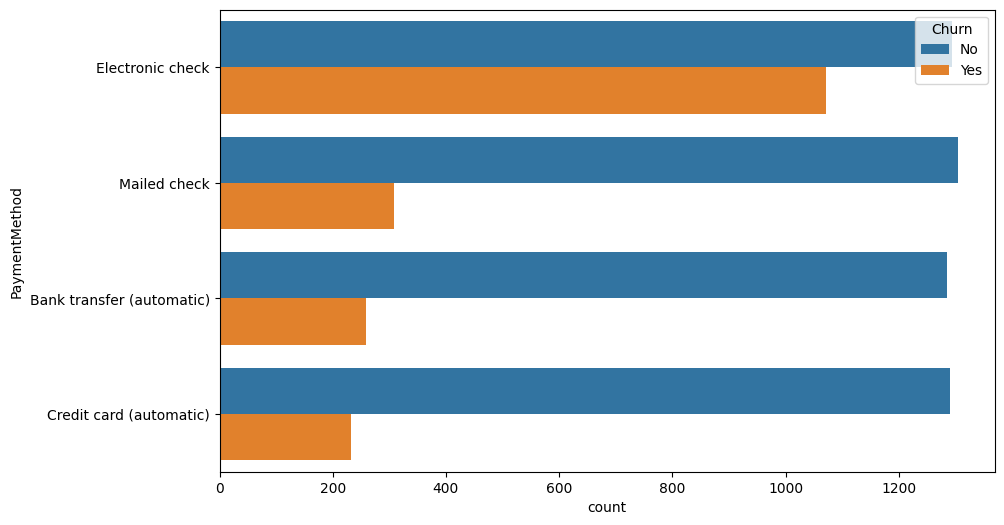

In [22]:
plt.subplots(figsize=(10,6))
sns.countplot(y = 'PaymentMethod', hue='Churn', data=df)

<Axes: xlabel='PaymentMethod', ylabel='count'>

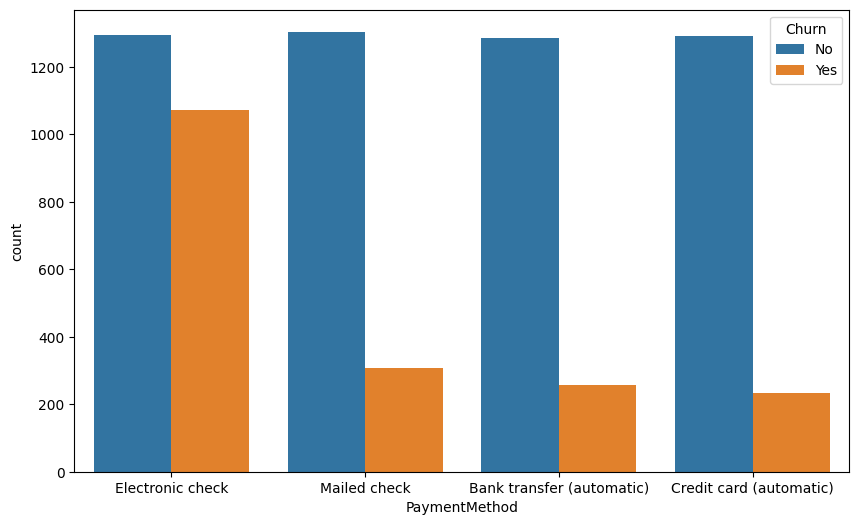

In [23]:
plt.subplots(figsize=(10,6))
sns.countplot(x = 'PaymentMethod', hue='Churn', data=df)

**Preprocess the dataset**

In [24]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [25]:
df.shape

(7043, 20)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Encode the data set**

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


**Seperate x, y**

In [32]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn'] #  churn is class

In [33]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [34]:
x.shape
#(7043, 19)-> 7043 row, 19 col

(7043, 19)

In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
y.shape
#a Series with 7043 elements

(7043,)

**Imbalanced Data Handling**

In [37]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [39]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


**Synthetic Minority Oversampling Technique (SMOTETomek)**

In [40]:
!pip install imblearn

# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from imblearn.combine import SMOTETomek

In [42]:
sm = SMOTETomek(random_state=100)

In [43]:
y.value_counts() # before sampling

0    5174
1    1869
Name: Churn, dtype: int64

In [44]:
X,Y = sm.fit_resample(x,y)

In [45]:
X.shape

(9652, 19)

In [46]:
Y.shape

(9652,)

In [47]:
Y.value_counts()

0    4826
1    4826
Name: Churn, dtype: int64

In [48]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
1,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550


In [49]:
X.shape

(9652, 19)

**Near Miss for Under_Sampling**

In [50]:
from imblearn.under_sampling import NearMiss

# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

In [51]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [52]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [53]:
new_x.shape

(3738, 19)

In [54]:
3738/2

1869.0

In [55]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int64

In [56]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

**Over Sampling**

In [57]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
over = RandomOverSampler(random_state=100)

In [61]:
x_new , y_new = over.fit_resample(x,y)

In [62]:
x_new.shape

(10348, 19)

In [63]:
y_new.shape

(10348,)

In [64]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

**Cross Validation**

**Hold Out Cross Validation**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42)

In [67]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [68]:
train , test = train_test_split(df, train_size=.80, random_state=42)

In [69]:
train.to_csv('total 80.csv')

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
Clf = DecisionTreeClassifier()

In [72]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [73]:
Clf.score(xtest,ytest) # after sampling

0.8608426749130267

**Without sampling**

In [74]:
x.shape

(7043, 19)

In [75]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42)

In [76]:
Clf.fit(xtrain1, ytrain1)

DecisionTreeClassifier()

In [77]:
Clf.score(xtest1,ytest1) # imbalanced old data

0.740488358886996

**XGBoost Classifier**

In [78]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import xgboost
from xgboost import XGBClassifier

In [80]:
xgb = XGBClassifier()

In [81]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [82]:
xgb.score(xtest,ytest) # After sampling

0.860456126787785

**Before sampling**

In [83]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
xgb.score(xtest1, ytest1)

0.7910278250993753

**Ada Boost**

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
ada = AdaBoostClassifier()

In [87]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [88]:
ada.score(xtest,ytest)

0.7715500579822188

**Before sampling**

In [89]:
ada.fit(xtrain1, ytrain1)

AdaBoostClassifier()

In [90]:
ada.score(xtest1, ytest1)

0.797274275979557

**Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()

In [93]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [94]:
rfc.score(xtest,ytest)

0.8913799768071125

**Before sampling**

In [95]:
rfc.fit(xtrain1, ytrain1)

RandomForestClassifier()

In [96]:
rfc.score(xtest1, ytest1)

0.7887563884156729

**Cross Validation**

**K Fold Cross Validation**

In [97]:
from sklearn.model_selection import KFold, cross_val_score

In [98]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [99]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold)

In [100]:
result

array([0.85024155, 0.84975845, 0.85603865, 0.85645239, 0.86031899])

In [101]:
result.mean()

0.8545620068973087

In [102]:
result.max()

0.860318994683422

In [103]:
result.min()

0.8497584541062801

In [104]:
result.mean()

0.8545620068973087

**Stratified k fold cross Validation**

In [111]:
from sklearn.model_selection import StratifiedKFold

In [112]:
st = StratifiedKFold(n_splits=5)

In [113]:
score2 = cross_val_score(xgb, x_new, y_new,cv=st)

In [114]:
score2

array([0.84975845, 0.85700483, 0.86714976, 0.8699855 , 0.88641856])

In [115]:
score2.max()

0.8864185596906718

In [116]:
score2.min()

0.8497584541062801

In [117]:
score2.mean()

0.866063420682119

**Leave One Out Cross Validation**

In [118]:
from sklearn.model_selection import LeaveOneOut

In [119]:
le = LeaveOneOut()

In [ ]:
result2 = cross_val_score(xgb,x,y,cv=le)

In [ ]:
result2

In [ ]:
result2.mean()